# El Problema
Se desea construir un modelo predictivo que dados ciertos datos de un estudiante, como el tipo de red que tiene,el dispositivo usa para tomar la clase o su situacion financiera, pueda predecir el nivel de adaptabilidad de dicho estudiante a sus clases online.

Como se puede ver este es un problema de clasificacion, para clasificar si el estudiante tiene un nivel de adaptabilidad de Bajo, Moderado o Alto

# Preparamos los datos

Se preparara el dataset para que la red neuronal pueda ser entrenada mediante limpieza de datos y hot encoding, en este caso no se encontraron valores nulos por lo que solo seria nesesario hacer el hot encoding

In [48]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

from pickle import load
import keras
from keras.utils.vis_utils import plot_model
from keras.models import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [26]:
datasetDirecction = "./training-ds.csv"
data_students = pd.read_csv(datasetDirecction)
data_students

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
959,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
960,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
961,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0,Bajo
962,3G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado


In [27]:
labels_map = {
    0: "Alto",
    1: "Bajo",
    2: "Moderado"
}
data_students_training = pd.get_dummies(data_students, columns=["Tipo de Red", "Estudiante de Tecnología", "Nivel de Educación", "Vive en Ciudad", "Tipo de Instituto", "Edad", "Dispositivo", "Tipo de Internet", "Situación Financiera", "Género", "Duración de la Clase"])
data_students_training["Nivel de Adaptación"] = data_students_training["Nivel de Adaptación"].astype('category').cat.codes
data_students_training

,Nivel de Adaptación,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,2,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0,0,0,1,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
960,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
961,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
962,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


In [28]:
print(type(data_students_training))
data_students_training.dtypes

<class 'pandas.core.frame.DataFrame'>


Nivel de Adaptación                int8
Tipo de Red_2G                    uint8
Tipo de Red_3G                    uint8
Tipo de Red_4G                    uint8
Estudiante de Tecnología_No       uint8
Estudiante de Tecnología_Si       uint8
Nivel de Educación_Colegio        uint8
Nivel de Educación_Escuela        uint8
Nivel de Educación_Universidad    uint8
Vive en Ciudad_No                 uint8
Vive en Ciudad_Si                 uint8
Tipo de Instituto_Privado         uint8
Tipo de Instituto_Público         uint8
Edad_01-May                       uint8
Edad_06-Oct                       uint8
Edad_16-20                        uint8
Edad_21-25                        uint8
Edad_26-30                        uint8
Edad_Nov-15                       uint8
Dispositivo_Computadora           uint8
Dispositivo_Smartphone            uint8
Dispositivo_Tableta               uint8
Tipo de Internet_Compra Megas     uint8
Tipo de Internet_Wifi             uint8
Situación Financiera_Buena        uint8


Ahora separamos los datos entre los datos de entrada(x) y el target(y) ademas de separarlos para el training y el test

In [29]:
dataset_x = data_students_training.iloc[0:,1:].to_numpy()
dataset_y = data_students_training.iloc[0:,0].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.8)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [30]:
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (771, 31)
y_train.shape: (771,)
x_test.shape: (193, 31)
y_test.shape: (193,)


# Armamos la arquitectura de la red neuronal
Ahora construimos nuestra arquitectura de la red neuronal usando tensorflow, esta arquitectura deberia tener 31 entradas y 3 salidas, para esta prueba utlizaremos una capa oculta de 32 neuronas ( n_units)

In [188]:
class NeuralNetwork(tf.keras.Model):
    def __init__(self,units_hiddenLayer):
        super(NeuralNetwork, self).__init__()
        self.sequence = tf.keras.Sequential([
          tf.keras.layers.Dense(units_hiddenLayer, activation='relu'),
          tf.keras.layers.Dense(3) # capa de salida
        ])
    
    def call(self, x: tf.Tensor) -> tf.Tensor:
        y_prime = self.sequence(x)
        return y_prime


model = NeuralNetwork(32)
model.build((1,31))
model.summary()

Model: "neural_network_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_185 (Sequential)  (1, 3)                   1123      
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


# Entrenamos la red neuronal
Con los datos supervisados de training entrenamos la red neuronal con los siguientes parametros

In [46]:
learning_rate = 0.1
batch_size = 64
epochs = 20
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ["accuracy"]

train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

model.compile(optimizer, loss_function, metrics)
print('\nFitting:')
model.fit(train_dataset_batched, epochs=epochs)



Fitting:
Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.7121
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.7121
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.7147
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.7276
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.7289
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7237
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7302
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7056
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7393
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7147
Epoch 11/

Optimizamos las funciones para manejarlo en un mismo y tener difentes pruebas 

In [110]:
epochs = 100

In [172]:
df_results_model_1 = pd.DataFrame()
df_results_model_1['MAX Accuracy'] = None
df_results_model_1['Learning rate'] = None
df_results_model_1['Batch size'] = None
df_results_model_1['Units hiddenLayer'] = None
df_results_model_1['Nro epoch'] = None

In [128]:
def trainModel(learning_rate,batch_size,units_hiddenLayer):
    model = NeuralNetwork(units_hiddenLayer)
    model.build((1,31)) # number 31 for its quantity of columns
    
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    metrics = ["accuracy"]

    train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
    test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

    model.compile(optimizer, loss_function, metrics)
    print('\nFitting:')
    model.fit(train_dataset_batched, epochs=epochs)
    
    
    print()
    history =list()
    history = model.history.history['accuracy']
    maxAcc = max(history)
    nro_epoch = history.index(maxAcc) + 1
    print( f"Accuracy:  {maxAcc}" )
    print( f"Learning rate:  {learning_rate}" )
    print( f"Batch size:  {batch_size}" )
    print( f"Units hiddenLayer: {units_hiddenLayer}")
    print( f"Nro epoch: {nro_epoch}")
    
    global df_results_model_1
    new_row = {'MAX Accuracy': maxAcc ,'Learning rate':learning_rate, 'Batch size': batch_size,'Units hiddenLayer':units_hiddenLayer,'Nro epoch':nro_epoch}
    df_results_model_1 = df_results_model_1.append(new_row, ignore_index=True)

### Variation with learning rate
The range of values to consider for the learning rate is less than 1.0 and greater than 10^-6.

In [173]:
vector_learning_rate = [1,0.1,0.01,0.001,0.0001]

for learning_rate in vector_learning_rate:
    batch_size =  64
    units_hiddenLayer = 32
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2305 - accuracy: 0.5668
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 1.0003 - accuracy: 0.5953
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.6187
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.6641
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.6355
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.6965
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.6589
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7082
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6900
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7263

13/13 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8431
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8547
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8534
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8470
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8444
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8677
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8547
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8457
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8534
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8612
Epoch 92/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7951
Epoch 64/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7756
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7782
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7912
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7860
Epoch 68/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7977
Epoch 69/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7756
Epoch 70/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5320 - accuracy: 0.7951
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7925
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7860
Epoch 73/100


13/13 [==============================] - 0s 2ms/step - loss: 0.7917 - accuracy: 0.6252
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7897 - accuracy: 0.6265
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.6252
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7861 - accuracy: 0.6278
Epoch 48/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.6265
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7829 - accuracy: 0.6291
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7814 - accuracy: 0.6278
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7793 - accuracy: 0.6329
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.6329
Epoch 53/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.6368
Epoch 54/100


13/13 [==============================] - 0s 1ms/step - loss: 1.0107 - accuracy: 0.4929
Epoch 26/100
13/13 [==============================] - 0s 1ms/step - loss: 1.0051 - accuracy: 0.4955
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 1.0002 - accuracy: 0.5019
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9951 - accuracy: 0.5006
Epoch 29/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9908 - accuracy: 0.5006
Epoch 30/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9864 - accuracy: 0.5006
Epoch 31/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9823 - accuracy: 0.5032
Epoch 32/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9784 - accuracy: 0.5123
Epoch 33/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9747 - accuracy: 0.5383
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9712 - accuracy: 0.5370
Epoch 35/100


Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 1.5041 - accuracy: 0.3502
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 1.5000 - accuracy: 0.3502
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4960 - accuracy: 0.3502
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4920 - accuracy: 0.3476
Epoch 10/100
13/13 [==============================] - 0s 919us/step - loss: 1.4882 - accuracy: 0.3476
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4844 - accuracy: 0.3476
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4805 - accuracy: 0.3476
Epoch 13/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4765 - accuracy: 0.3476
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4726 - accuracy: 0.3476
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4690 - accuracy: 0.3476
Ep

13/13 [==============================] - 0s 1ms/step - loss: 1.2582 - accuracy: 0.3878
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2560 - accuracy: 0.3878
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2537 - accuracy: 0.3878
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.3878
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2495 - accuracy: 0.3826
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2473 - accuracy: 0.3826
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2451 - accuracy: 0.3800
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2430 - accuracy: 0.3774
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2408 - accuracy: 0.3839
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 1.2388 - accuracy: 0.3774
Epoch 97/100


En la tabla inferior podemos observar que con un valor de learning rate de 1 , presenta un mejor resultado en su Accurancy

In [174]:
df_results_model_1

,MAX Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.869001,1.0000,64.0,32.0,99.0
1,0.819715,0.1000,64.0,32.0,95.0
2,0.695201,0.0100,64.0,32.0,100.0
3,0.609598,0.0010,64.0,32.0,98.0
4,0.387808,0.0001,64.0,32.0,86.0


### Variation with Batch size
The number of batch sizes should be a power of 2, more recommedes are 32 and 64

In [175]:
vector_batch_size = [16,32,64,128,256]

for batch_size in vector_batch_size:
    learning_rate = 1
    units_hiddenLayer = 32
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
49/49 [==============================] - 1s 1ms/step - loss: 0.9499 - accuracy: 0.5616
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 0.8369 - accuracy: 0.6148
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 0.7897 - accuracy: 0.6576
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.7665 - accuracy: 0.6719
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 0.7160 - accuracy: 0.7004
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.7173
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6952
Epoch 8/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7198
Epoch 9/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.7069
Epoch 10/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7030

49/49 [==============================] - 0s 856us/step - loss: 0.3976 - accuracy: 0.7613
Epoch 83/100
49/49 [==============================] - 0s 815us/step - loss: 0.4062 - accuracy: 0.7990
Epoch 84/100
49/49 [==============================] - 0s 794us/step - loss: 0.4004 - accuracy: 0.8003
Epoch 85/100
49/49 [==============================] - 0s 940us/step - loss: 0.4102 - accuracy: 0.7795
Epoch 86/100
49/49 [==============================] - 0s 856us/step - loss: 0.3998 - accuracy: 0.7847
Epoch 87/100
49/49 [==============================] - 0s 815us/step - loss: 0.4276 - accuracy: 0.7782
Epoch 88/100
49/49 [==============================] - 0s 836us/step - loss: 0.4917 - accuracy: 0.7691
Epoch 89/100
49/49 [==============================] - 0s 877us/step - loss: 0.4209 - accuracy: 0.7938
Epoch 90/100
49/49 [==============================] - 0s 898us/step - loss: 0.4127 - accuracy: 0.7756
Epoch 91/100
49/49 [==============================] - 0s 836us/step - loss: 0.4026 - accuracy: 

25/25 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8664
Epoch 63/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8379
Epoch 64/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8612
Epoch 65/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8405
Epoch 66/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8586
Epoch 67/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8664
Epoch 68/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8573
Epoch 69/100
25/25 [==============================] - 0s 961us/step - loss: 0.3098 - accuracy: 0.8586
Epoch 70/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8560
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8820
Epoch 72/10

13/13 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8392
Epoch 44/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8418
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8262
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8327
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8431
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8327
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8444
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8210
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8353
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8340
Epoch 53/100


7/7 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7769
Epoch 25/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7886
Epoch 26/100
7/7 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7458
Epoch 27/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7367
Epoch 28/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7847
Epoch 29/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8054
Epoch 30/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8106
Epoch 31/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7821
Epoch 32/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8029
Epoch 33/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8249
Epoch 34/100
7/7 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.6018
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6342
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9435 - accuracy: 0.5357
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7876 - accuracy: 0.6381
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8286 - accuracy: 0.6018
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8613 - accuracy: 0.5629
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7344 - accuracy: 0.6848
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.6887
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.6926
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.7173
Epoch 16/100
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8586
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8444
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8534
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8586
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8534
Epoch 94/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8405
Epoch 95/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8340
Epoch 96/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7250
Epoch 97/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7899
Epoch 98/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8547
Epoch 99/100
4/4 [===============

In [176]:
df_results_model_1

,MAX Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.869001,1.0000,64.0,32.0,99.0
1,0.819715,0.1000,64.0,32.0,95.0
2,0.695201,0.0100,64.0,32.0,100.0
3,0.609598,0.0010,64.0,32.0,98.0
4,0.387808,0.0001,64.0,32.0,86.0
5,0.822309,1.0000,16.0,32.0,52.0
6,0.881971,1.0000,32.0,32.0,71.0
7,0.871595,1.0000,64.0,32.0,95.0
8,0.872892,1.0000,128.0,32.0,94.0
9,0.866407,1.0000,256.0,32.0,100.0


In this case, with the variation of batch size of 32 and 64 present better results

### Variation with Units of hidden Layer
It's recommended to be a power of 2

In [177]:
vector_units_hiddenLayer = [16,32,64,128,256,512,1024,2048,4096]

for units_hiddenLayer in vector_units_hiddenLayer:
    learning_rate = 1
    batch_size = 32 
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 1.1343 - accuracy: 0.5097
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8536 - accuracy: 0.5992
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.6615
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.6861
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.6719
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.7004
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8105 - accuracy: 0.6667
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6913
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7030
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7198

25/25 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8457
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8405
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8508
Epoch 85/100
25/25 [==============================] - 0s 919us/step - loss: 0.3508 - accuracy: 0.8508
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8275
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8405
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8288
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8340
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8521
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8418
Epoch 92/10

25/25 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8573
Epoch 63/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8768
Epoch 64/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8612
Epoch 65/100
25/25 [==============================] - 0s 961us/step - loss: 0.3153 - accuracy: 0.8729
Epoch 66/100
25/25 [==============================] - 0s 961us/step - loss: 0.3022 - accuracy: 0.8638
Epoch 67/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8586
Epoch 68/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.8651
Epoch 69/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8716
Epoch 70/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8664
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.8638
Epoch 72/

25/25 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8495
Epoch 43/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8405
Epoch 44/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8664
Epoch 45/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8560
Epoch 46/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8586
Epoch 47/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8599
Epoch 48/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8586
Epoch 49/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8599
Epoch 50/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8573
Epoch 51/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8638
Epoch 52/100


25/25 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8288
Epoch 24/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8521
Epoch 25/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8379
Epoch 26/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8599
Epoch 27/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8547
Epoch 28/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8457
Epoch 29/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8431
Epoch 30/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8547
Epoch 31/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8534
Epoch 32/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8599
Epoch 33/100


Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.6965
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.7147
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7523
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7458
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7458
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7601
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7756
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7769
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7886
Epoch 13/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8003
Epoch 

Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8690
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.8716
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.8742
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8742
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8690
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8729
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8690
Epoch 93/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.8703
Epoch 94/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.8846
Epoch 95/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8807


25/25 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8690
Epoch 67/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8729
Epoch 68/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.8703
Epoch 69/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.8755
Epoch 70/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8716
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2642 - accuracy: 0.8768
Epoch 72/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.8833
Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.8768
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.8703
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8677
Epoch 76/100


25/25 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8716
Epoch 48/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.8651
Epoch 49/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8729
Epoch 50/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8755
Epoch 51/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8768
Epoch 52/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8781
Epoch 53/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8690
Epoch 54/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8807
Epoch 55/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8755
Epoch 56/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.8716
Epoch 57/100


25/25 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8547
Epoch 29/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8625
Epoch 30/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8612
Epoch 31/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8729
Epoch 32/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8716
Epoch 33/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8690
Epoch 34/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8677
Epoch 35/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8599
Epoch 36/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8638
Epoch 37/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8495
Epoch 38/100


Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7743
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8106
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7821
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.8003
Epoch 13/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7808
Epoch 14/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8223
Epoch 15/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8223
Epoch 16/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8210
Epoch 17/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8444
Epoch 18/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8547
E

25/25 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8768
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8716
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8742
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8755
Epoch 94/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.8755
Epoch 95/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8781
Epoch 96/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8742
Epoch 97/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8755
Epoch 98/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8781
Epoch 99/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8794
Epoch 100/100

In [178]:
df_results_model_1

,MAX Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.869001,1.0000,64.0,32.0,99.0
1,0.819715,0.1000,64.0,32.0,95.0
2,0.695201,0.0100,64.0,32.0,100.0
3,0.609598,0.0010,64.0,32.0,98.0
4,0.387808,0.0001,64.0,32.0,86.0
5,0.822309,1.0000,16.0,32.0,52.0
6,0.881971,1.0000,32.0,32.0,71.0
7,0.871595,1.0000,64.0,32.0,95.0
8,0.872892,1.0000,128.0,32.0,94.0
9,0.866407,1.0000,256.0,32.0,100.0


In [179]:
for units_hiddenLayer in vector_units_hiddenLayer:
    learning_rate = 1
    batch_size = 64
    trainModel(learning_rate,batch_size,units_hiddenLayer)


Fitting:
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9758 - accuracy: 0.5499
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.8846 - accuracy: 0.6355
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7770 - accuracy: 0.6304
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.6848
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.7147
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6861
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.6887
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7289
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7004
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7289

13/13 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8418
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8457
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8586
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8495
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8470
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8599
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8470
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8482
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8560
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8495
Epoch 92/100


13/13 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8521
Epoch 64/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8534
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8392
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8418
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8547
Epoch 68/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8729
Epoch 69/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8625
Epoch 70/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8534
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8573
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8599
Epoch 73/100


13/13 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8586
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8612
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8677
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8418
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8612
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8651
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8521
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8625
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8651
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8560
Epoch 54/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8171
Epoch 26/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8288
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8197
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8236
Epoch 29/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8314
Epoch 30/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8444
Epoch 31/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8457
Epoch 32/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8405
Epoch 33/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8470
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8495
Epoch 35/100


Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7255 - accuracy: 0.7004
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.7147
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.6809
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.7497
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7185
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.7160
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7756
Epoch 13/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7769
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.7691
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7925
Epoc

Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.8846
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.8846
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8781
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.8807
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8781
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.8807
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8768
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8768
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.8755
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8807


13/13 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8703
Epoch 69/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8768
Epoch 70/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.8885
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8664
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8612
Epoch 73/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.8742
Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8833
Epoch 75/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8768
Epoch 76/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8690
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8859
Epoch 78/100


13/13 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8677
Epoch 50/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8742
Epoch 51/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8729
Epoch 52/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8729
Epoch 53/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8677
Epoch 54/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8690
Epoch 55/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8690
Epoch 56/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.8846
Epoch 57/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8755
Epoch 58/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8625
Epoch 59/100


13/13 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8470
Epoch 31/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8288
Epoch 32/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8431
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8586
Epoch 34/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8612
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8690
Epoch 36/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8755
Epoch 37/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8327
Epoch 38/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8573
Epoch 39/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8651
Epoch 40/100


13/13 [==============================] - 0s 4ms/step - loss: 0.5388 - accuracy: 0.7691
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7613
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.7626
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7834
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7912
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4950 - accuracy: 0.7977
Epoch 17/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8171
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.7990
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.8016
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.8029
Epoch 21/100


13/13 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.8781
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2665 - accuracy: 0.8794
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.8794
Epoch 96/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.8781
Epoch 97/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.8690
Epoch 98/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.8794
Epoch 99/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.8781
Epoch 100/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.8755

Accuracy:  0.887159526348114
Learning rate:  1
Batch size:  64
Units hiddenLayer: 4096
Nro epoch: 68


In [180]:
df_results_model_1

,MAX Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
0,0.869001,1.0000,64.0,32.0,99.0
1,0.819715,0.1000,64.0,32.0,95.0
2,0.695201,0.0100,64.0,32.0,100.0
3,0.609598,0.0010,64.0,32.0,98.0
4,0.387808,0.0001,64.0,32.0,86.0
5,0.822309,1.0000,16.0,32.0,52.0
6,0.881971,1.0000,32.0,32.0,71.0
7,0.871595,1.0000,64.0,32.0,95.0
8,0.872892,1.0000,128.0,32.0,94.0
9,0.866407,1.0000,256.0,32.0,100.0


In [181]:
# Table saved in CSV:
filename = "df_results_model_1"
df_results_model_1.to_csv(filename, header=True, index=False)

In [182]:
# To open
data = pd.read_csv(filename, header=0)


data_by_acc = data.sort_values('MAX Accuracy',ascending=False)
data_by_acc.head()

,MAX Accuracy,Learning rate,Batch size,Units hiddenLayer,Nro epoch
13,0.892348,1.0,32.0,128.0,76.0
18,0.892348,1.0,32.0,4096.0,55.0
16,0.891051,1.0,32.0,1024.0,92.0
17,0.889754,1.0,32.0,2048.0,51.0
24,0.888457,1.0,64.0,512.0,70.0


Como se entreno anteriomente, se obtiene el mejor resultado con los siguientes parámetros
- learning_rate: 1
- batch_size: 32
- units_hiddenLayer:  128

Se aplicar estos parámetros y se guardará el modelo en el epoch que presenta mayor accurancy para proceder despues con la evalución

In [202]:
model_save_file_name = "Model_"
history_save_file_name = "History_"
imageLossEpochs_save_file_name = "loss_vs_epochs_model_"

def trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, model_save_file_name,history_save_file_name):
    model = NeuralNetwork(units_hiddenLayer)
    model.build((1,31)) # number 31 for its quantity of columns
    
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    metrics = ["accuracy"]

    train_dataset_batched = train_dataset.batch(batch_size).shuffle(500)
    test_dataset_batched = test_dataset.batch(batch_size).shuffle(500)

    model.compile(optimizer, loss_function, metrics)
    print('\nFitting:')
    checkpoint = ModelCheckpoint(model_save_file_name, monitor='accuracy', verbose=1,save_best_only=True, mode='max')
    model.fit(train_dataset_batched, epochs=epochs,callbacks=[checkpoint])
    save_history(history_save_file_name, model)
    
# to graph 
def graph_loss_vs_epochs(history_save_file_name, save_image_filename, title):
    history = np.load(history_save_file_name,allow_pickle='TRUE').item()
    training_loss = history['loss']
    test_loss = history['accuracy'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Loss', 'Accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)


Fitting:
Epoch 1/150
 1/25 [>.............................] - ETA: 6s - loss: 1.1003 - accuracy: 0.2188
Epoch 1: accuracy improved from -inf to 0.51232, saving model to Model_1
INFO:tensorflow:Assets written to: Model_1\assets
25/25 [==============================] - 2s 59ms/step - loss: 1.0245 - accuracy: 0.5123
Epoch 2/150
25/25 [==============================] - ETA: 0s - loss: 0.7965 - accuracy: 0.6187
Epoch 2: accuracy improved from 0.51232 to 0.61868, saving model to Model_1
INFO:tensorflow:Assets written to: Model_1\assets
25/25 [==============================] - 1s 52ms/step - loss: 0.7965 - accuracy: 0.6187
Epoch 3/150
 1/25 [>.............................] - ETA: 0s - loss: 0.5969 - accuracy: 0.8125
Epoch 3: accuracy improved from 0.61868 to 0.69390, saving model to Model_1
INFO:tensorflow:Assets written to: Model_1\assets
25/25 [==============================] - 1s 49ms/step - loss: 0.7095 - accuracy: 0.6939
Epoch 4/150
 1/25 [>.............................] - ETA: 0s - los

Epoch 32/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8438
Epoch 32: accuracy did not improve from 0.86900
25/25 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8612
Epoch 33/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8125
Epoch 33: accuracy improved from 0.86900 to 0.87549, saving model to Model_1
INFO:tensorflow:Assets written to: Model_1\assets
25/25 [==============================] - 1s 45ms/step - loss: 0.2970 - accuracy: 0.8755
Epoch 34/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8750
Epoch 34: accuracy did not improve from 0.87549
25/25 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8677
Epoch 35/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3137 - accuracy: 0.9062
Epoch 35: accuracy did not improve from 0.87549
25/25 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8

25/25 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8664
Epoch 67/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1979 - accuracy: 0.8750
Epoch 67: accuracy improved from 0.87938 to 0.88197, saving model to Model_1
INFO:tensorflow:Assets written to: Model_1\assets
25/25 [==============================] - 1s 45ms/step - loss: 0.2696 - accuracy: 0.8820
Epoch 68/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3231 - accuracy: 0.7812
Epoch 68: accuracy did not improve from 0.88197
25/25 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8703
Epoch 69/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8438
Epoch 69: accuracy did not improve from 0.88197
25/25 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.8729
Epoch 70/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1972 - accuracy: 0.8750
Epoch 70: accuracy did not improve from 0.88

 1/25 [>.............................] - ETA: 0s - loss: 0.2142 - accuracy: 0.8750
Epoch 101: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8859
Epoch 102/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9688
Epoch 102: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8755
Epoch 103/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8750
Epoch 103: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.8768
Epoch 104/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2695 - accuracy: 0.9062
Epoch 104: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8781
Epoch 105/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2607 - ac

 1/25 [>.............................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8125
Epoch 136: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.8859
Epoch 137/150
 1/25 [>.............................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8750
Epoch 137: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.8755
Epoch 138/150
 1/25 [>.............................] - ETA: 0s - loss: 0.0987 - accuracy: 1.0000
Epoch 138: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.8820
Epoch 139/150
 1/25 [>.............................] - ETA: 0s - loss: 0.2505 - accuracy: 1.0000
Epoch 139: accuracy did not improve from 0.88716
25/25 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.8820
Epoch 140/150
 1/25 [>.............................] - ETA: 0s - loss: 0.1592 - ac

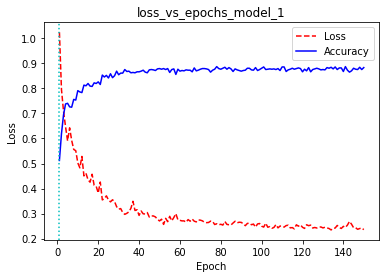

In [203]:
Id_variation = "1"
md_file_name = model_save_file_name + Id_variation
ht_file_name = history_save_file_name + Id_variation
image_file_name = imageLossEpochs_save_file_name + Id_variation

epochs = 150
learning_rate = 1
batch_size = 32
units_hiddenLayer = 128
# trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, model_save_file_name,history_save_file_name)
trainModel_andSave(learning_rate,batch_size,units_hiddenLayer, md_file_name,ht_file_name)
# graph_loss_vs_epochs(history_save_file_name, save_image_filename, title):
graph_loss_vs_epochs(ht_file_name +".npy", image_file_name, image_file_name)

In [205]:
# Recrea exactamente el mismo modelo solo desde el archivo
model= keras.models.load_model(md_file_name)

# Evaluando el modelo
Despues de entrenar el modelo y ver su accuracy, evaluamosel modelo con el dataset para test

In [206]:
print('\nEvaluating:')
test_loss, test_accuracy = model.evaluate(test_dataset_batched)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
4/4 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8290

Test accuracy: 82.9%, test loss: 0.626580


In [207]:
datasetDirecction = "./test-ds.csv"
data_students = pd.read_csv(datasetDirecction)
data_students

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,3G,No,Colegio,No,Público,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar
1,4G,No,Colegio,No,Privado,16-20,Smartphone,Wifi,Media,Femenino,01-Mar
2,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0
3,3G,Si,Universidad,No,Público,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar
4,3G,No,Escuela,No,Público,06-Oct,Smartphone,Compra Megas,Media,Femenino,0
...,...,...,...,...,...,...,...,...,...,...,...
236,4G,No,Escuela,Si,Privado,01-May,Smartphone,Wifi,Media,Femenino,01-Mar
237,4G,No,Escuela,Si,Privado,01-May,Smartphone,Compra Megas,Media,Femenino,01-Mar
238,4G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar
239,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar


## Haciendo una prediccion
Una vez se tenga un modelo entrenado y probado con un buen accuracy podemos empezar a hacer predicciones con otros datos, para esta practica se utilizara el test-ds.csv para predecir el nivel de adaptacion

# Preparacion de datos

In [208]:
datasetDirecction = "./test-ds.csv"
data_students_test = pd.read_csv(datasetDirecction)
data_students_test

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,3G,No,Colegio,No,Público,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar
1,4G,No,Colegio,No,Privado,16-20,Smartphone,Wifi,Media,Femenino,01-Mar
2,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0
3,3G,Si,Universidad,No,Público,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar
4,3G,No,Escuela,No,Público,06-Oct,Smartphone,Compra Megas,Media,Femenino,0
...,...,...,...,...,...,...,...,...,...,...,...
236,4G,No,Escuela,Si,Privado,01-May,Smartphone,Wifi,Media,Femenino,01-Mar
237,4G,No,Escuela,Si,Privado,01-May,Smartphone,Compra Megas,Media,Femenino,01-Mar
238,4G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar
239,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar


In [209]:
data_students_test = pd.get_dummies(data_students_test, columns=None)
data_students_test

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
3,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
237,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
238,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
239,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [211]:
dataset_test_x = data_students_test.iloc[0:].to_numpy()
predicted_names = []
for row in dataset_test_x:
    predicted_vector = model.predict(np.array([row]))
    predicted_index = np.argmax(predicted_vector)
    predicted_name = labels_map[predicted_index]
    predicted_names.append(predicted_name)

predicted_data = pd.DataFrame({'Nivel de Adaptación': np.array(predicted_names)})
predicted_data

,Nivel de Adaptación
0,Bajo
1,Bajo
2,Bajo
3,Bajo
4,Bajo
...,...
236,Moderado
237,Moderado
238,Moderado
239,Moderado


In [212]:
predicted_data.to_csv('predicted-ds.csv')

Dudas
- Para el nivel de educacion colegio y escuela son lo mismo
- las fechas en las edades

# Fuentes
- https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-keras/4-train
- https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-keras/2-data?source=learn
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Class para facilitar el manejo Funciones para el procesamiento de datos

class Predict_studentAdaptability():
    self.data_students = None
    
def process_data_OHE(datasetPath):
    data_students = pd.read_csv(datasetDirecction)